In [1]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r', encoding='utf-8', errors='ignore')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [2]:
# load all stories in a directory
def load_stories(directory):
    for name in listdir(directory):
        filename = directory + '/' + name
        # load document
        doc = load_doc(filename)

In [3]:
# split a document into news story and highlights
def split_story(doc):
    # find first highlight
    index = doc.find('@highlight')
    # split into story and highlights
    story, highlights = doc[:index], doc[index:].split('@highlight')
    # strip extra white space around each highlight
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [4]:
# load all stories in a directory
def load_stories(directory):
    all_stories = list()
    for name in listdir(directory):
        filename = directory + '/' + name
        # load document
        doc = load_doc(filename)
        # split into story and highlights
        story, highlights = split_story(doc)
        # store
        all_stories.append({'story':story, 'highlights':highlights})
    return all_stories

In [5]:
from os import listdir

# load stories
directory = 'C:\\Users\\kar_d\\Documents\\pramodini\\NCSU\\CSC-791\\P1-Final\\R0a\\implementation\\cnn_stories\\cnn\\stories\\'

stories = load_stories(directory)
print('Loaded Stories %d' % len(stories))

Loaded Stories 92579


In [6]:
print(stories[4]['story'])
print(stories[4]['highlights'])

(CNN) -- Police arrested another teen Thursday, the sixth suspect jailed in connection with the gang rape of a 15-year-old girl on a northern California high school campus.

Jose Carlos Montano, 18, was arrested on charges of felony rape, rape in concert with force, and penetration with a foreign object, said Richmond Police Lt. Mark Gagan.

Montano was arrested Thursday evening in San Pablo, California, a small town about two miles from the city of Richmond, where the crime took place.

Montano, who was held in lieu of $1.3 million bail, is accused of taking part in what police said was a 2½-hour assault on the Richmond High School campus.

Police said as many as 10 people were involved in the rape in a dimly lit back alley at the school, while another 10 people watched without calling 911.

The victim was taken to the hospital in critical condition, but was released Wednesday.

Four other teenage suspects were arraigned Thursday on charges connected to the rape.

Cody Ray Smith, desc

In [7]:
dict_1 = {}
for i in range(len(stories)):
    dict_1.update({stories[i]['story'] : stories[i]['highlights']})

In [8]:
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot


## for processing
import re
import nltk

In [9]:
df = pd.DataFrame(dict_1.items(), columns=['story', 'highlight'])

In [10]:
df.head(3)

,story,highlight
0,It's official: U.S. President Barack Obama wan...,[Syrian official: Obama climbed to the top of ...
1,(CNN) -- Usain Bolt rounded off the world cham...,[Usain Bolt wins third gold of world champions...
2,"Kansas City, Missouri (CNN) -- The General Ser...",[The employee in agency's Kansas City office i...


In [11]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
            
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
   
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [12]:
new_stopwords = ["(CNN) -- ",'cnn']
df_stopwords = nltk.corpus.stopwords.words("english")
df_stopwords.extend(new_stopwords)



df["clean_story"] = df["story"].apply(lambda x:
                                      utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
                                                            lst_stopwords=df_stopwords))
df["clean_highlight"] = df["highlight"].apply(lambda x:
                                                utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
                                                                      lst_stopwords=df_stopwords))
df.head()

,story,highlight,clean_story,clean_highlight
0,It's official: U.S. President Barack Obama wan...,[Syrian official: Obama climbed to the top of ...,official u president barack obama want lawmake...,syrian official obama climbed top tree doesnt ...
1,(CNN) -- Usain Bolt rounded off the world cham...,[Usain Bolt wins third gold of world champions...,usain bolt rounded world championship sunday c...,usain bolt win third gold world championship a...
2,"Kansas City, Missouri (CNN) -- The General Ser...",[The employee in agency's Kansas City office i...,kansa city missouri general service administra...,employee agency kansa city office among hundre...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,[NEW: A Canadian doctor says she was part of a...,los angeles medical doctor vancouver british c...,new canadian doctor say part team examining ha...
4,(CNN) -- Police arrested another teen Thursday...,[Another arrest made in gang rape outside Cali...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...


In [13]:
df.size

357536

In [14]:
# we didn't find any duplicate or null stories in the data

df.drop_duplicates(subset=['story'],inplace=True)#dropping duplicates
df.dropna(axis=0,inplace=True)#dropping na

In [15]:
df.size

357536

In [16]:
len(df)

89384

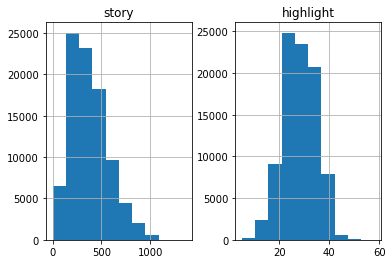

In [17]:
story_word_count = []
highlight_word_count = []

# populate the lists with sentence lengths
for i in df['clean_story']:
      story_word_count.append(len(i.split()))

for i in df['clean_highlight']:
      highlight_word_count.append(len(i.split()))

length_df = pd.DataFrame({'story':story_word_count, 'highlight':highlight_word_count})

length_df.hist(bins = 10)
plt.show()

In [18]:
print("story word cnt = %(n)s and rare word cnt = %(b)s " % {'n': len(story_word_count), 'b': len(highlight_word_count)})


story word cnt = 89384 and rare word cnt = 89384 


In [19]:
cnt=0
for i in df['clean_story']:
    if(len(i.split())<=80):
        cnt=cnt+1
              
print(cnt/len(df['clean_story']))

0.012373579164056207


In [20]:
print(cnt)

1106


In [21]:
cnt=0
for i in df['clean_highlight']:
    if(len(i.split())<=10):
        cnt=cnt+1
print(cnt/len(df['clean_highlight']))

0.002651481249440616


In [22]:
print(cnt)

237


In [185]:
max_story_len=1000
max_highlight_len=150

clean_story =np.array(df['clean_story'])
clean_highlight=np.array(df['clean_highlight'])

short_story=[]
short_highlight=[]

for i in range(len(clean_story)):
    if(len(clean_highlight[i].split())<=max_highlight_len and len(clean_story[i].split())<=max_story_len):
        short_story.append(clean_story[i])
        short_highlight.append(clean_highlight[i])
        
df_1=pd.DataFrame({'story':short_story,'highlight':short_highlight})

In [186]:
df_1.size

178362

In [187]:
len(df_1)

89181

In [188]:
df_1['highlight'] = df_1['highlight'].apply(lambda x : 'sostok '+ x + ' eostok')

In [189]:
for i in range(3):
    print("story:",df_1['story'][i])
    print("highlight:",df_1['highlight'][i])
    print("\n")

story: official u president barack obama want lawmaker weigh whether use military force syria obama sent letter head house senate saturday night hour announcing belief military action syrian target right step take alleged use chemical weapon proposed legislation obama asks congress approve use military force deter disrupt prevent degrade potential future us chemical weapon weapon mass destruction step set turn international crisis fierce domestic political battle key question looming debate un weapon inspector find syria happens congress vote syrian government react televised address white house rose garden earlier saturday president said would take case congress want believe authority carry military action without specific congressional authorization know country stronger take course action even effective said debate issue big business usual obama said top congressional leader agreed schedule debate body return washington september 9 senate foreign relation committee hold hearing matt

In [190]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df_1['story']),np.array(df_1['highlight']),test_size=0.002,train_size=0.008,random_state=42,shuffle=True) 

In [191]:
df_1.size

178362

In [192]:
len(np.array(df_1['story']))

89181

In [193]:
print(x_tr.shape, y_tr.shape, x_val.shape, y_val.shape)

(713,) (713,) (179,) (179,)


In [194]:
from keras.preprocessing.text import Tokenizer 

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [195]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 72.48297167528939
Total Coverage of rare words: 12.10124455982286


<p style="color:tomato;">Tokenize the text again by considering the total number of words minus the rare occurrences. Convert text to numbers and pad them all to the same length.</p>
First, a Tokenizer instance is fitted (fit_on_texts) to the corpus creating a vocabulary index based on word frequency. Every word is mapped to an index, so every word gets a unique integer value, lower integer means more frequent words. The size of words to keep is defined by the num_words parameter, i.e, vocabulary size. 
The sentences from the input are then mapped to integers using the tokenizer.texts_to_sequences
Lastly, in order to create embeddings, all of our sentences need to be of same length. Hence, we use the pad_sequencesto pad each sentence with zero.

In [196]:
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_story_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_story_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [197]:
print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 7394


In [198]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [199]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 85.61011904761905
Total Coverage of rare words: 41.92906861120318


In [200]:
#prepare a tokenizer for summaries on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_highlight_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_highlight_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [201]:
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 968


In [202]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(713, 713)

In [203]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [204]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [205]:
print(x_tr.shape, y_tr.shape, x_val.shape, y_val.shape)

(712, 1000) (712, 150) (179, 1000) (179, 150)


In [206]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [207]:
import tensorflow as tf
logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

In [208]:
from attention import AttentionLayer
from keras import backend as K 
K.clear_session()

latent_dim = 500
#embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_story_len,))

#embedding layer
enc_emb =  Embedding(x_voc, latent_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, latent_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)


In [47]:
# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 500)    3697000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 1000, 500),  2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [48]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [49]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModel_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [50]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es],batch_size=50, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 1.5637  
Epoch 00001: val_loss improved from inf to 0.66499, saving model to .\MyModel_tf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\MyModel_tf\assets
15/15 [==============================] - 3009s 201s/step - loss: 1.5637 - val_loss: 0.6650
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.7325  
Epoch 00002: val_loss improved from 0.66499 to 0.65298, saving model to .\MyModel_tf
INFO:tensorflow:Assets written to: .\MyModel_tf\assets
15/15 [==============================] - 4680s 312s/step - loss: 0.7325 - val_loss: 0.6530
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.7173  
Epoch 00003: val_loss improved from 0.65298 to 0.64000, saving model to .\MyM

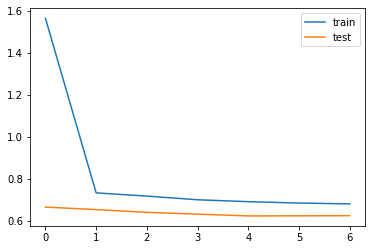

In [51]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Using DropOut Rate

In [49]:
# Encoder
encoder_inputs = Input(shape=(max_story_len,))

#embedding layer
enc_emb =  Embedding(x_voc, latent_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, latent_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

In [48]:
# Define the model 
model_dropout = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_dropout.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 500)    3697000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 1000, 500),  2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [49]:
model_dropout.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [50]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModelDropout_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [51]:
history_dropout=model_dropout.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es],batch_size=50, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 1.4721  
Epoch 00001: val_loss improved from inf to 0.67330, saving model to .\MyModelDropout_tf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\MyModelDropout_tf\assets
15/15 [==============================] - 3095s 206s/step - loss: 1.4721 - val_loss: 0.6733
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.7385  
Epoch 00002: val_loss improved from 0.67330 to 0.65397, saving model to .\MyModelDropout_tf
INFO:tensorflow:Assets written to: .\MyModelDropout_tf\assets
15/15 [==============================] - 5131s 342s/step - loss: 0.7385 - val_loss: 0.6540
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.7205   
Epoch 00003: val_loss improved from 0.65397 to 0

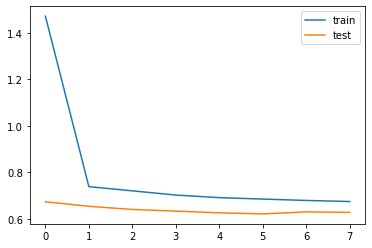

In [100]:
pyplot.plot(history_dropout.history['loss'], label='train')
pyplot.plot(history_dropout.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [82]:
latent_dim = 300
embedding_dim=100
max_story_len = 300
max_heighlight_len = 80
# Encoder
encoder_inputs = Input(shape=(max_story_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.2,recurrent_dropout=0.2)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, latent_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

In [83]:
# Define the model 
model_dropout_1 = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_dropout_1.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 300, 100)     739400      input_6[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 300, 300), ( 481200      embedding_2[0][0]                
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [84]:
model_dropout_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [85]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModelDropout_1_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [ ]:
history_dropout_1=model_dropout_1.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es],batch_size=50, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [ ]:
pyplot.plot(history_dropout_1.history['loss'], label='train')
pyplot.plot(history_dropout_1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Using Adam Optimizer

In [48]:
# Define the model 
model_dropout_adam = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_dropout_adam.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 500)    3697000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 1000, 500),  2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [49]:
from keras.optimizers import Adam
model_dropout_adam.compile(optimizer=Adam(lr=0.005), loss='sparse_categorical_crossentropy')

In [50]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModelDropout_adam_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [52]:
history_dropout_adam=model_dropout_adam.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es],batch_size=50, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 0.7505  
Epoch 00001: val_loss improved from 0.68407 to 0.64677, saving model to .\MyModelDropout_adam_tf
INFO:tensorflow:Assets written to: .\MyModelDropout_adam_tf\assets
15/15 [==============================] - 4001s 267s/step - loss: 0.7505 - val_loss: 0.6468
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.7205  
Epoch 00002: val_loss improved from 0.64677 to 0.63229, saving model to .\MyModelDropout_adam_tf
INFO:tensorflow:Assets written to: .\MyModelDropout_adam_tf\assets
15/15 [==============================] - 4572s 305s/step - loss: 0.7205 - val_loss: 0.6323
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.7082  
Epoch 00003: val_loss improved from 0.63229 to 0.63094, saving model to .\MyModelDropout_adam_tf
INFO:tensorflow:Assets written to: .\MyModelDropout_adam_tf\assets
15/15 [==============================] - 5032s 335s/step - loss: 0.7082 - val_loss: 0.6309
Epoc

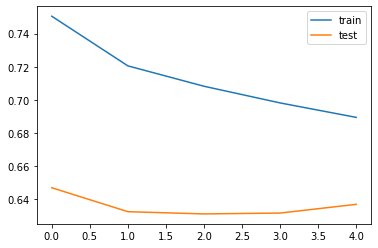

In [53]:
pyplot.plot(history_dropout_adam.history['loss'], label='train')
pyplot.plot(history_dropout_adam.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Set up the inference for the encoder and decoder:

convert the index to word for summaries and reviews vocabulary

In [209]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

Setting up the inference for the encoder and decoder

In [210]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_story_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

Defining a function for implementation of the inference process

In [211]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
                # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, 2:]) + 2
        sampled_token = reverse_target_word_index[sampled_token_index]
        #print(sampled_token)
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_highlight_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


converting an integer sequence to a word sequence for summaries and reviews

In [212]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

## Results

In [213]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

#print(target_word_index)


In [216]:
import colorama
from colorama import Fore, Style

for i in range(0,10):
    print("Story:",seq2text(x_tr[i]))
    print(Fore.RED + "Original summary:",seq2summary(y_tr[i]))
    print(Fore.BLUE + "Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_story_len)))
    print(Style.RESET_ALL)
    print("\n")

Story: washington accusation irs add one first opinion nonpartisan official agency went outside law conclusion tuesday official responsible managing historically important u record came congressional hearing republican also tried spotlight irs scandal include white house david head national archive record administration told house panel irs follow law failed tell agency loss email belonging former irs official lerner lerner email particularly senior manager far connected irs targeting tea party political group lerner retired last year refused testify congress constitutional right house charged contempt result lack testimony frustrated republican investigator week ago irs revealed lerner hard drive crashed 2011 destroying thousand email document agency insists missing email checking account irs employee lerner republican technical aspect crash well whether irs followed federal record keeping law better system electronic information law also require agency archive loss official record tu